In [1]:
import pandas as pd
import os
import seaborn as sns

In [16]:
os.chdir('c:\\Users\\Pablo\\Documents\\Climate DataThon 2022\\Climate-DataThon-2022')

### Read SOCAT Data

In [ ]:
'''******************************************************************************							
**** NOTE: rows containing no data (cruise count is zero) are not printed ****							
******************************************************************************							
							
							
             DATA SET: ./SOCAT_tracks_gridded_monthly.nc							
             SOCAT gridded v2022 Monthly 1x1 degree gridded dataset							
             LONGITUDE: 179.5W(-179.5)							
             LATITUDE: 89.5S							
             TIME: 1970-01-16 12:00							
 Column  1: DATE is ISO Date representing the month midpoint (axis TMNTH)							
 Column  2: LAT is Latitude (axis YLAT)							
 Column  3: LON is Longitude (axis XLON)							
 Column  4: COUNT_NCRUISE is Number of cruises (count)							
 Column  5: FCO2_COUNT_NOBS is Number of fco2 obs (count)							
 Column  6: FCO2_AVE_WEIGHTED is fCO2 mean - per cruise weighted (uatm)							
 Column  7: FCO2_AVE_UNWTD is fCO2 mean - unweighted all obs (uatm)							
 Column  8: FCO2_MIN_UNWTD is fCO2 min (uatm)							
 Column  9: FCO2_MAX_UNWTD is fCO2 max (uatm)							
 Column 10: SST_COUNT_NOBS is Number of valid sst obs (count)							
 Column 11: SST_AVE_WEIGHTED is SST mean - per cruise weighted (degrees C)							
 Column 12: SST_AVE_UNWTD is SST mean - unweighted all obs (degrees C)							
 Column 13: SST_MIN_UNWTD is SST min (degrees C)							
 Column 14: SST_MAX_UNWTD is SST max (degrees C)							
 Column 15: SALINITY_COUNT_NOBS is Number of valid salinity obs (count)							
 Column 16: SALINITY_AVE_WEIGHTED is Salinity mean - per cruise weighted (PSU)							
 Column 17: SALINITY_AVE_UNWTD is Salinity mean - unweighted all obs (PSU)							
 Column 18: SALINITY_MIN_UNWTD is Salinity min (PSU)							
 Column 19: SALINITY_MAX_UNWTD is Salinity max (PSU)							
							
Missing values are represented as -1.E+34							
'''

In [24]:
SOCAT_monthly = pd.read_csv('Data\SOCATv2022_tracks_gridded_monthly.csv', skiprows=255)
SOCAT_monthly['DATE'] = pd.to_datetime(SOCAT_monthly['DATE'] )
SOCAT_monthly.head(10)

,DATE,LAT,LON,COUNT_NCRUISE_YEAR,FCO2_COUNT_NOBS_YEAR,FCO2_AVE_WEIGHTED_YEAR,FCO2_AVE_UNWTD_YEAR,FCO2_MIN_UNWTD_YEAR,FCO2_MAX_UNWTD_YEAR,SST_COUNT_NOBS_YEAR,SST_AVE_WEIGHTED_YEAR,SST_AVE_UNWTD_YEAR,SST_MIN_UNWTD_YEAR,SST_MAX_UNWTD_YEAR,SALINITY_COUNT_NOBS_YEAR,SALINITY_AVE_WEIGHTED_YEAR,SALINITY_AVE_UNWTD_YEAR,SALINITY_MIN_UNWTD_YEAR,SALINITY_MAX_UNWTD_YEAR
0,1970-02-15,9.5,156.5,1,1,303.672,303.672,303.672,303.672,1,28.2000,28.2000,28.2,28.2,0,-1.000000e+34,-1.000000e+34,-1.000000e+34,-1.000000e+34
1,1970-02-15,9.5,157.5,1,11,311.013,311.013,306.311,321.797,11,28.4091,28.4091,28.2,28.5,0,-1.000000e+34,-1.000000e+34,-1.000000e+34,-1.000000e+34
2,1970-02-15,9.5,158.5,1,8,321.322,321.322,316.141,326.150,8,28.3750,28.3750,28.2,28.5,0,-1.000000e+34,-1.000000e+34,-1.000000e+34,-1.000000e+34
3,1970-02-15,10.5,155.5,1,1,305.066,305.066,305.066,305.066,1,27.9000,27.9000,27.9,27.9,0,-1.000000e+34,-1.000000e+34,-1.000000e+34,-1.000000e+34
4,1970-02-15,10.5,156.5,1,4,305.424,305.424,302.806,307.795,4,28.0500,28.0500,28.0,28.1,0,-1.000000e+34,-1.000000e+34,-1.000000e+34,-1.000000e+34
5,1970-02-15,10.5,158.5,1,7,316.268,316.268,312.197,319.688,7,27.9714,27.9714,27.7,28.2,0,-1.000000e+34,-1.000000e+34,-1.000000e+34,-1.000000e+34
6,1970-02-15,11.5,154.5,1,1,312.031,312.031,312.031,312.031,1,27.8000,27.8000,27.8,27.8,0,-1.000000e+34,-1.000000e+34,-1.000000e+34,-1.000000e+34
7,1970-02-15,11.5,155.5,1,5,307.460,307.460,305.709,310.458,5,27.9000,27.9000,27.9,27.9,0,-1.000000e+34,-1.000000e+34,-1.000000e+34,-1.000000e+34
8,1970-02-15,11.5,158.5,1,7,316.924,316.924,312.901,322.048,7,27.6714,27.6714,27.6,27.7,0,-1.000000e+34,-1.000000e+34,-1.000000e+34,-1.000000e+34
9,1970-02-15,12.5,153.5,1,1,306.911,306.911,306.911,306.911,1,27.6000,27.6000,27.6,27.6,0,-1.000000e+34,-1.000000e+34,-1.000000e+34,-1.000000e+34


Lets group by year to see an overall change in CO2

In [33]:
SOCAT_monthly.columns

Index(['DATE', ' LAT', ' LON', ' COUNT_NCRUISE_YEAR', ' FCO2_COUNT_NOBS_YEAR',
       ' FCO2_AVE_WEIGHTED_YEAR', ' FCO2_AVE_UNWTD_YEAR',
       ' FCO2_MIN_UNWTD_YEAR', ' FCO2_MAX_UNWTD_YEAR', ' SST_COUNT_NOBS_YEAR',
       ' SST_AVE_WEIGHTED_YEAR', ' SST_AVE_UNWTD_YEAR', ' SST_MIN_UNWTD_YEAR',
       ' SST_MAX_UNWTD_YEAR', ' SALINITY_COUNT_NOBS_YEAR',
       ' SALINITY_AVE_WEIGHTED_YEAR', ' SALINITY_AVE_UNWTD_YEAR',
       ' SALINITY_MIN_UNWTD_YEAR', ' SALINITY_MAX_UNWTD_YEAR'],
      dtype='object')

In [37]:
SOCAT_monthly.groupby(SOCAT_monthly.DATE.dt.year)[' FCO2_AVE_WEIGHTED_YEAR', ' FCO2_MIN_UNWTD_YEAR', ' FCO2_MAX_UNWTD_YEAR'].mean().reset_index()

C:\Users\Pablo\AppData\Local\Temp/ipykernel_17340/1059436680.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  SOCAT_monthly.groupby(SOCAT_monthly.DATE.dt.year)[' FCO2_AVE_WEIGHTED_YEAR', ' FCO2_MIN_UNWTD_YEAR', ' FCO2_MAX_UNWTD_YEAR'].mean().reset_index()


,DATE,FCO2_AVE_WEIGHTED_YEAR,FCO2_MIN_UNWTD_YEAR,FCO2_MAX_UNWTD_YEAR
0,1970,301.145795,298.402968,304.071412
1,1973,294.448030,289.051939,298.944121
2,1974,319.841720,316.847600,323.393760
3,1975,312.281735,308.930029,316.022559
4,1976,311.088020,308.035160,314.395120
5,1977,300.586000,299.535800,302.238929
6,1978,315.590949,312.806622,318.600783
7,1979,345.571385,340.570992,350.783540
8,1980,346.896434,342.863490,351.311953
9,1981,296.179182,290.986234,301.415653


In [38]:
SOCAT_monthly.describe(include= 'all')

C:\Users\Pablo\AppData\Local\Temp/ipykernel_17340/4286643872.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  SOCAT_monthly.describe(include= 'all')


,DATE,LAT,LON,COUNT_NCRUISE_YEAR,FCO2_COUNT_NOBS_YEAR,FCO2_AVE_WEIGHTED_YEAR,FCO2_AVE_UNWTD_YEAR,FCO2_MIN_UNWTD_YEAR,FCO2_MAX_UNWTD_YEAR,SST_COUNT_NOBS_YEAR,SST_AVE_WEIGHTED_YEAR,SST_AVE_UNWTD_YEAR,SST_MIN_UNWTD_YEAR,SST_MAX_UNWTD_YEAR,SALINITY_COUNT_NOBS_YEAR,SALINITY_AVE_WEIGHTED_YEAR,SALINITY_AVE_UNWTD_YEAR,SALINITY_MIN_UNWTD_YEAR,SALINITY_MAX_UNWTD_YEAR
count,346460,346460.000000,346460.000000,346460.000000,346460.000000,346460.000000,346460.000000,346460.000000,346460.000000,346460.000000,3.464600e+05,3.464600e+05,3.464600e+05,3.464600e+05,346460.000000,3.464600e+05,3.464600e+05,3.464600e+05,3.464600e+05
unique,529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-01-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,1970-02-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,15.747356,1.911773,1.139277,97.242374,360.511728,360.517639,350.451451,371.742030,97.227296,-1.385441e+30,-1.385441e+30,-1.385441e+30,-1.385441e+30,90.966721,-1.178087e+33,-1.178087e+33,-1.178087e+33,-1.178087e+33
std,NaN,38.886761,114.887094,0.489235,379.054144,48.051448,48.133753,49.257382,61.005728,379.020959,1.176968e+32,1.176968e+32,1.176968e+32,1.176968e+32,377.459164,3.223819e+33,3.223819e+33,3.223819e+33,3.223819e+33
min,NaN,-78.500000,-179.500000,1.000000,1.000000,44.496600,44.496600,7.198820,45.541100,0.000000,-1.000000e+34,-1.000000e+34,-1.000000e+34,-1.000000e+34,0.000000,-1.000000e+34,-1.000000e+34,-1.000000e+34,-1.000000e+34
25%,NaN,-7.500000,-82.500000,1.000000,10.000000,337.685750,337.677000,330.084000,344.760000,10.000000,9.042250e+00,9.040240e+00,8.547750e+00,9.504000e+00,6.000000,3.298480e+01,3.298360e+01,3.281000e+01,3.313075e+01


C:\Users\Pablo\AppData\Local\Temp/ipykernel_17340/3226535953.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ax = sns.lineplot(x="DATE", y=" FCO2_AVE_WEIGHTED_YEAR", data=SOCAT_monthly.groupby(SOCAT_monthly.DATE.dt.year)[' FCO2_AVE_WEIGHTED_YEAR', ' FCO2_MIN_UNWTD_YEAR', ' FCO2_MAX_UNWTD_YEAR'].mean().reset_index())


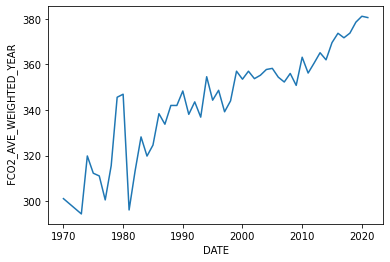

In [41]:
ax = sns.lineplot(x="DATE", y=" FCO2_AVE_WEIGHTED_YEAR", data=SOCAT_monthly.groupby(SOCAT_monthly.DATE.dt.year)[' FCO2_AVE_WEIGHTED_YEAR', ' FCO2_MIN_UNWTD_YEAR', ' FCO2_MAX_UNWTD_YEAR'].mean().reset_index())